In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns#가설검정 및 통계분석 패키지
from scipy import stats
import scipy.stats
from statsmodels.formula.api import ols#ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm
#proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import statsmodels.formula.api as smf

from statsmodels.api import qqplot

from sklearn import metrics

matplotlib.rc('font',family='NanumGothic')
matplotlib.rc('axes',unicode_minus=False)

In [2]:
df = pd.read_csv('./Member_data_Allsum.csv')
df.head()

/tmp/ipykernel_20183/2865079125.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Member_data_Allsum.csv')


,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매일로부터기간,고객분류,총구매횟수,총결제금액,총사용포인트
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,460,이탈고객,1.0,16314.0,9486.0
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,527,이탈고객,1.0,3800.0,1810.0
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,453,이탈고객,2.0,95844.0,23196.0
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,376,이탈고객,2.0,116532.0,35388.0
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,556,이탈고객,1.0,19900.0,8020.0


In [58]:
df['결제등록카드'].unique()

array(['국민은행', '하나은행', '기업은행', '신한은행', 'BC카드', '농협회원조합', '롯데카드', '대구은행',
       '우리은행', 'SC제일은행', '농협중앙회', '광주은행', '현대카드', '신한카드', '삼성카드', '국민카드',
       '외환은행', '새마을금고', '씨티은행', '미래에셋증권', '우체국', '부산은행', '신협중앙회', '경남은행'],
      dtype=object)

In [4]:
df = df[df['고객분류'] == '이탈고객']
df['고객분류'].unique()

array(['이탈고객'], dtype=object)

In [53]:
# 새로운 칼럼 생성
df['연령대'] = pd.cut(df['연령'], bins=[20, 23, 26, 29, 33, 36, 39, 43, 100], labels=['20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반', '40대 초반', '40대 중후반'])

# 새로운 칼럼 생성
# df['Age Range'] = pd.cut(df['Age'], bins=[20, 23, 26, 29], labels=['20대 초반', '20대 중반', '20대 후반'])

df['유입경로'].unique()

array(['인스타그램', '검색광고', '네이버블로그', '지인추천', '직접검색', '네이버카페', '오픈마켓', '페이스북',
       '매장쿠폰', '이마트'], dtype=object)

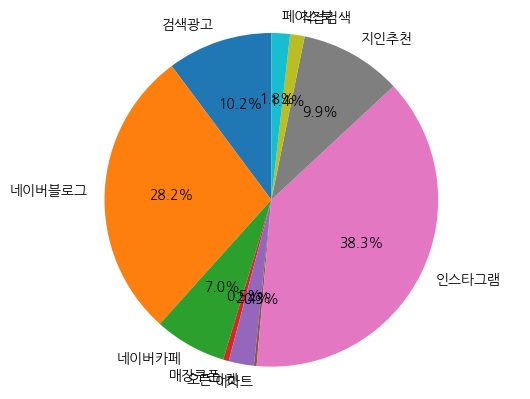

유입경로
검색광고      10.19
네이버블로그    28.16
네이버카페      6.99
매장쿠폰       0.55
오픈마켓       2.44
이마트        0.26
인스타그램     38.33
지인추천       9.87
직접검색       1.41
페이스북       1.80
Name: 고객번호, dtype: float64

In [55]:
# 이탈 고객의 연령대
purchase_from = df.groupby('유입경로')['고객번호'].count()
purchase_from =  (purchase_from /30341) *100
purchase_from.round(2)
labels=['검색광고', '네이버블로그', '네이버카페', '매장쿠폰', '오픈마켓', '이마트', '인스타그램', '지인추천',
       '직접검색', '페이스북']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_from.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_from.round(2)

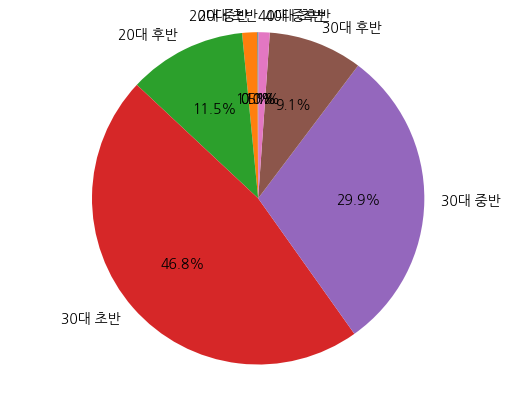

연령대
20대 초반      0.088988
20대 중반      1.463366
20대 후반     11.476220
30대 초반     46.801358
30대 중반     29.900135
30대 후반      9.149336
40대 초반      1.090933
40대 중후반     0.029663
Name: 고객번호, dtype: float64

In [32]:
# 이탈 고객의 연령대
purchase_count = df.groupby('연령대')['고객번호'].count()
purchase_count =  (purchase_count /30341) *100
purchase_count.round(2)
labels=['20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반', '40대 초반', '40대 중후반']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_count.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_count

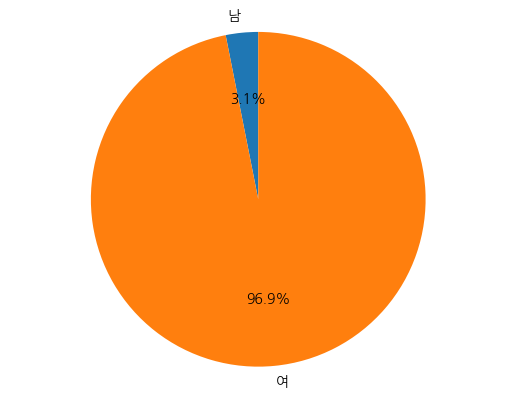

성별
남     3.117893
여    96.882107
Name: 고객번호, dtype: float64

In [34]:
# 이탈 고객의 성별
purchase_sex = df.groupby('성별')['고객번호'].count()

purchase_sex =  (purchase_sex /30341) *100
purchase_sex.round(2)
labels=['남', '여']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_sex.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_sex

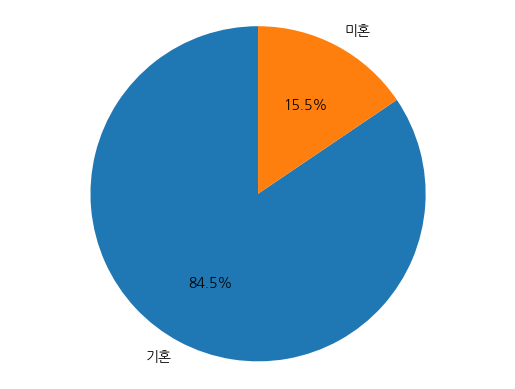

결혼유무
기혼    84.466563
미혼    15.533437
Name: 고객번호, dtype: float64

In [37]:
# 이탈 고객의 결혼 유무
purchase_marry = df.groupby('결혼유무')['고객번호'].count()
purchase_marry =  (purchase_marry /30341) *100
purchase_marry.round(2)
labels=['기혼', '미혼']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_marry.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_marry

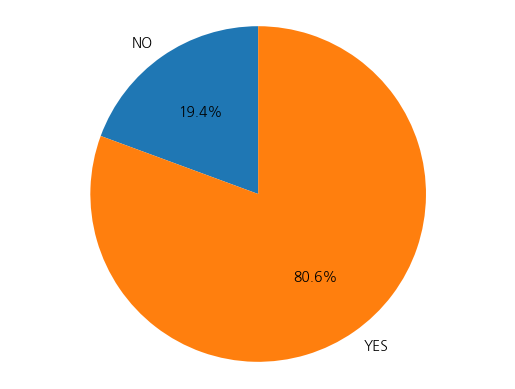

자녀여부
No     19.379717
Yes    80.620283
Name: 고객번호, dtype: float64

In [38]:
# 이탈 고객의 자여유무
purchase_kids = df.groupby('자녀여부')['고객번호'].count()
purchase_kids =  (purchase_kids /30341) *100
purchase_kids.round(2)
labels=['NO', 'YES']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_kids.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_kids

In [57]:
df['거주지역'].unique()

array(['인천', '제주', '부산', '경남', '서울', '경북', '충북', '대전', '충남', '강원', '경기',
       '대구', '전남', '광주', '전북'], dtype=object)

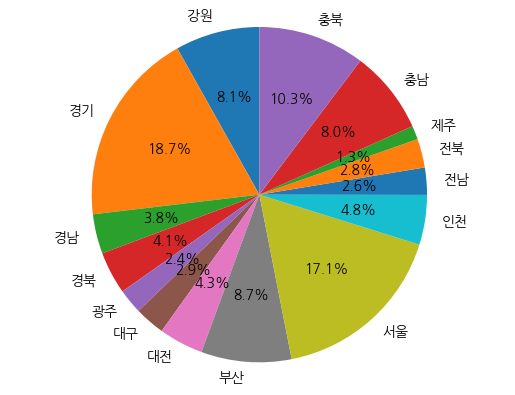

거주지역
강원     8.144095
경기    18.737023
경남     3.816618
경북     4.100063
광주     2.396098
대구     2.906958
대전     4.287927
부산     8.704393
서울    17.098975
인천     4.792195
전남     2.620217
전북     2.778419
제주     1.315052
충남     8.015557
충북    10.286411
Name: 고객번호, dtype: float64

In [39]:
# 이탈 고객의 거주지역
purchase_location = df.groupby('거주지역')['고객번호'].count()
purchase_location =  (purchase_location /30341) *100
purchase_location.round(2)
labels=['강원', '경기','경남','경북'  ,  
'광주'     ,
'대구'     ,
'대전'    ,
'부산'    ,
'서울'    ,
'인천'    ,
'전남'     ,
'전북'     ,
'제주'     ,
'충남'    ,
'충북']
fig1, ax1 = plt.subplots()
ax1.pie(purchase_location.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_location

In [41]:
df_s = pd.read_csv('./sales_join_member.csv')
df_s.head()

/tmp/ipykernel_20183/1873270091.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./sales_join_member.csv')


,Unnamed: 0,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,...,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매일로부터기간,고객분류,연령대
0,0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,2.019010e+14,74560,43825,팬티,...,여,기혼,서울,30.0,롯데카드,인스타그램,Yes,585,이탈고객,30대 초반
1,1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,2.019010e+14,74560,43825,팬티,...,남,기혼,충북,28.0,광주은행,인스타그램,Yes,585,이탈고객,20대 후반
2,2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,2.018123e+14,53920,36769,팬티,...,여,미혼,서울,31.0,신협중앙회,인스타그램,No,353,잠재이탈고객,30대 초반
3,3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,2.018123e+14,52160,32408,팬티,...,여,기혼,서울,35.0,신한카드,인스타그램,Yes,535,이탈고객,30대 중반
4,4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,2.018123e+14,47360,30066,팬티,...,여,기혼,강원,32.0,롯데카드,인스타그램,Yes,585,이탈고객,30대 초반


In [50]:
df_ss = df_s[df_s['고객분류'] == '이탈고객']
df_ss['고객분류'].unique()

df_ss['물품소분류'].unique()

array(['팬티형', '일반형', '화장지/물티슈', '수유용품', '스킨케어', '위생용품', '생리대', '주방용품',
       '세탁용품', '기타', '욕실용품', '장난감', '의류', '유아동침구', '건강기능식품', '생활용품',
       '청소용품', '음식'], dtype=object)

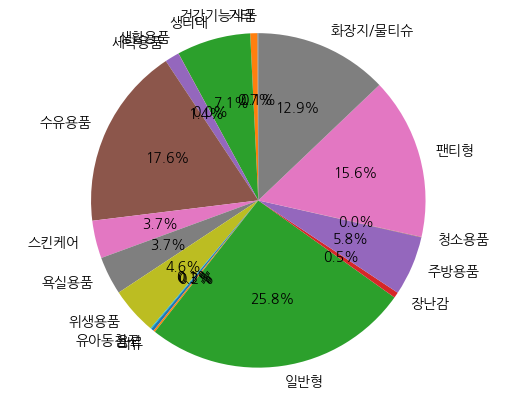

물품소분류
건강기능식품      0.13
기타          1.12
생리대        11.52
생활용품        0.02
세탁용품        2.25
수유용품       28.43
스킨케어        5.89
욕실용품        5.96
위생용품        7.37
유아동침구       0.15
음식          0.44
의류          0.27
일반형        41.55
장난감         0.88
주방용품        9.28
청소용품        0.08
팬티형        25.21
화장지/물티슈    20.78
Name: 고객번호, dtype: float64

In [56]:
# 이탈 고객의 자여유무
purchase_par = df_ss.groupby('물품소분류')['고객번호'].count()
purchase_par =  (purchase_par /30341) *100
purchase_par.round(2)
labels=['건강기능식품', '기타', '생리대', '생활용품', '세탁용품', '수유용품', '스킨케어', '욕실용품',
       '위생용품', '유아동침구', '음식', '의류', '일반형', '장난감', '주방용품', '청소용품',
       '팬티형', '화장지/물티슈']

fig1, ax1 = plt.subplots()
ax1.pie(purchase_par.round(2), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

purchase_par.round(2)

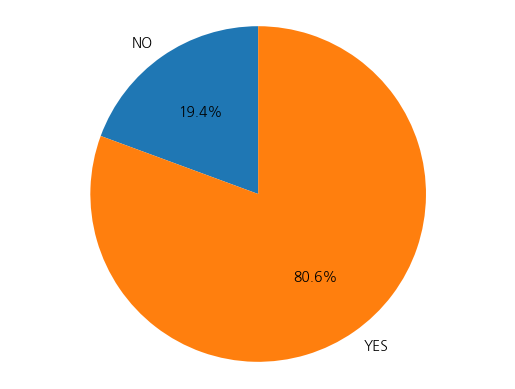

자녀여부
No     19.379717
Yes    80.620283
Name: 고객번호, dtype: float64

In [40]:
purchase_par = df_ss.groupby('유입경로')['고객번호'].count()